In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np

In [2]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['N°Panneau.1', 'Sexe.1', 'Nom.1', 'Prénom.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1']]
df_RF = df[['N°Panneau.2', 'Sexe.2', 'Nom.2', 'Prénom.2', 'Voix.2', '% Voix/Ins.2', '% Voix/Exp.2']]
df_ME = df[['N°Panneau.3', 'Sexe.3', 'Nom.3', 'Prénom.3', 'Voix.3', '% Voix/Ins.3', '% Voix/Exp.3']]
df_LJ = df[['N°Panneau.4', 'Sexe.4', 'Nom.4', 'Prénom.4', 'Voix.4', '% Voix/Ins.4', '% Voix/Exp.4']]
df_LPM = df[['N°Panneau.5', 'Sexe.5', 'Nom.5', 'Prénom.5', 'Voix.5', '% Voix/Ins.5', '% Voix/Exp.5']]
df_ZE = df[['N°Panneau.6', 'Sexe.6', 'Nom.6', 'Prénom.6', 'Voix.6', '% Voix/Ins.6', '% Voix/Exp.6']]
df_MJL = df[['N°Panneau.7', 'Sexe.7', 'Nom.7', 'Prénom.7', 'Voix.7', '% Voix/Ins.7', '% Voix/Exp.7']]
df_HA = df[['N°Panneau.8', 'Sexe.8', 'Nom.8', 'Prénom.8', 'Voix.8', '% Voix/Ins.8', '% Voix/Exp.8']]
df_JY = df[['N°Panneau.9', 'Sexe.9', 'Nom.9', 'Prénom.9', 'Voix.9', '% Voix/Ins.9', '% Voix/Exp.9']]
df_PV = df[['N°Panneau.10', 'Sexe.10', 'Nom.10', 'Prénom.10', 'Voix.10', '% Voix/Ins.10', '% Voix/Exp.10']]
df_PP = df[['N°Panneau.11', 'Sexe.11', 'Nom.11', 'Prénom.11', 'Voix.11', '% Voix/Ins.11', '% Voix/Exp.11']]
df_DAN = df[['N°Panneau.12', 'Sexe.12', 'Nom.12', 'Prénom.12', 'Voix.12', '% Voix/Ins.12', '% Voix/Exp.12']]

df

c:\Users\hedil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Voix.11,% Voix/Ins.11,% Voix/Exp.11,N°Panneau.12,Sexe.12,Nom.12,Prénom.12,Voix.12,% Voix/Ins.12,% Voix/Exp.12
0,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,0001,213,38,"17,84",...,3,"1,41","1,75",12,M,DUPONT-AIGNAN,Nicolas,0,"0,00","0,00"
1,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0001,1129,266,"23,56",...,8,"0,71","0,95",12,M,DUPONT-AIGNAN,Nicolas,13,"1,15","1,55"
2,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0002,1128,265,"23,49",...,4,"0,35","0,48",12,M,DUPONT-AIGNAN,Nicolas,20,"1,77","2,38"
3,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0003,1213,246,"20,28",...,3,"0,25","0,32",12,M,DUPONT-AIGNAN,Nicolas,19,"1,57","2,00"
4,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0004,933,224,"24,01",...,4,"0,43","0,57",12,M,DUPONT-AIGNAN,Nicolas,26,"2,79","3,73"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69676,ZZ,Français établis hors de France,6,6ème circonscription,229,Zurich,1,24868,14101,"56,70",...,47,"0,19","0,44",12,M,DUPONT-AIGNAN,Nicolas,189,"0,76","1,77"
69677,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,1,1709,942,"55,12",...,10,"0,59","1,32",12,M,DUPONT-AIGNAN,Nicolas,10,"0,59","1,32"
69678,ZZ,Français établis hors de France,11,11ème circonscription,233,Nour-Soultan,1,117,64,"54,70",...,0,"0,00","0,00",12,M,DUPONT-AIGNAN,Nicolas,1,"0,85","1,96"
69679,ZZ,Français établis hors de France,2,2ème circonscription,234,Monterrey,1,713,553,"77,56",...,1,"0,14","0,63",12,M,DUPONT-AIGNAN,Nicolas,1,"0,14","0,63"


In [5]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans un dataset candidat : ", df.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans un dataset candidat :  105
Nombre d'observations dans un dataset candidat :  69681


In [7]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalVot = np.sum(df['Votants'])
totalAbs = np.sum(df['Abstentions'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votants : ", totalVot)
print("Nombre d'abstentionnistes : ", totalAbs)

Nombre d'inscrits :  48747231
Nombre de votants :  35923170
Nombre d'abstentionnistes :  12824061


In [24]:
# Quels sont les différents taux ?

rappVot = 100*totalVot/totalIns
rappAbs = 100*totalAbs/totalIns

print("Absentention : ", rappAbs, "%")
print("Participation : ", rappVot, "%")

Absentention :  26.307260406237226 %
Participation :  73.69273959376277 %


In [31]:
voixCandidat = np.array([np.sum(df['Voix.1']), np.sum(df['Voix.2']), np.sum(df['Voix.3']), np.sum(df['Voix.4']), np.sum(df['Voix.5']), np.sum(df['Voix.6']), np.sum(df['Voix.7']), np.sum(df['Voix.8']), np.sum(df['Voix.9']), np.sum(df['Voix.10']), np.sum(df['Voix.11']), np.sum(df['Voix.12'])])
label = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], df['Nom.9'][0], df['Nom.10'][0], df['Nom.11'][0], df['Nom.12'][0]]

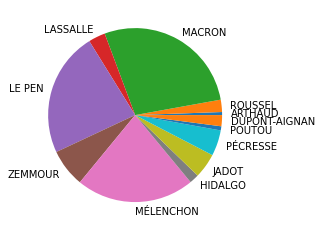

In [32]:
plt.pie(voixCandidat, labels=label)
plt.show()